In [47]:
def Relaxiter(T,err,iter,nx,ny,omg):
    s=0
    e=1
    res = 0
    while e > err and s<iter:
        e = 0
        for i in range(1,ny-1):
            for j in range(1,nx-1):
                temp = (T[i-1,j]+T[i+1,j]+T[i,j-1]+T[i,j+1])/4
                res = temp - T[i,j]
                T[i,j] += omg*res
        
        e =abs (res)
        s += 1

    return T,s

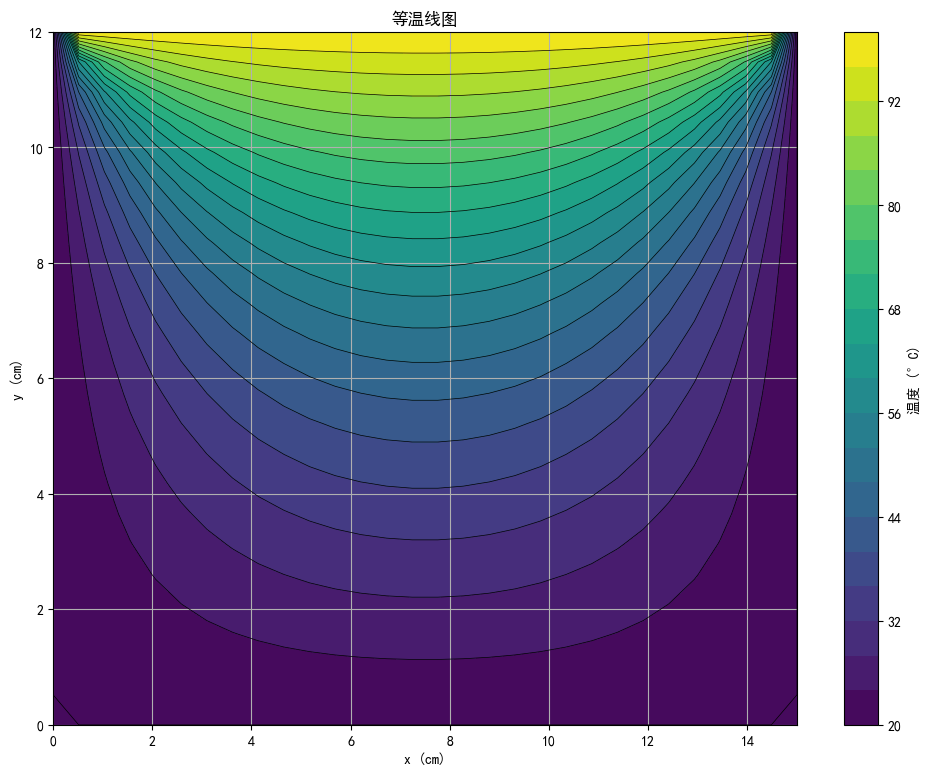

In [32]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['SimHei']  # 指定默认字体
plt.rcParams['axes.unicode_minus'] = False

T = np.zeros((24,30))
T[-1,:] = 100
T[0,:] = 20
T[:,0] = 20
T[:,-1] = 20
T , i =Relaxiter(T,0.0001,10000,30,24,1.5)


#画图
x = np.linspace(0,15,30)
y = np.linspace(0,12,24)
X,Y = np.meshgrid(x,y)
plt.figure(figsize=(12, 9))
contour = plt.contourf(X, Y, T, levels=20, cmap='viridis')
plt.colorbar(contour, label='温度 (°C)')
plt.contour(X, Y, T, levels=20, colors='k', linewidths=0.5)
plt.title('等温线图')
plt.xlabel('x (cm)')
plt.ylabel('y (cm)')
plt.grid(True)
plt.show()


In [66]:
omg = np.linspace(0.7,2,30)
s = np.zeros(30)   

In [67]:
for i in range(30):
    T = np.zeros((24,30))
    T[-1,:] = 100
    T[0,:] = 20
    T[:,0] = 20
    T[:,-1] = 20
    
    T, s[i] =Relaxiter(T,0.000001,1000,30,24,omg[i])
    

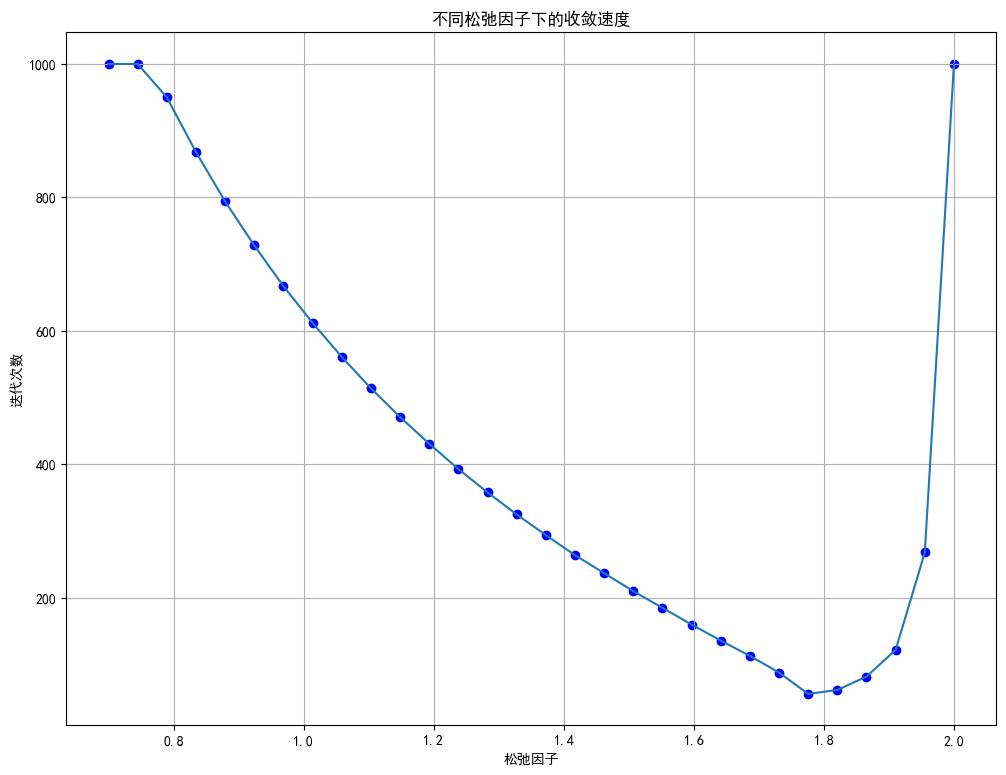

In [70]:
plt.figure(figsize=(12, 9))
plt.plot(omg,s)
plt.scatter(omg, s, color='b')
plt.title('不同松弛因子下的收敛速度')
plt.xlabel('松弛因子')
plt.ylabel('迭代次数')
plt.grid(True)
plt.show()

In [72]:
x = [15,30,45,60]
aim = np.zeros(4)
for k in range(4):
    kk=k+1
    omg = np.linspace(0.7,2,100)
    s = np.zeros(100)
    for i in range(100):
        T = np.zeros((12*kk,15*kk))
        T[-1,:] = 100
        T[0,:] = 20
        T[:,0] = 20
        T[:,-1] = 20
    
        T, s[i] =Relaxiter(T,0.000001,400,15*kk,12*kk,omg[i])  
    
    aim[k]=omg[np.argmin(s)]
    

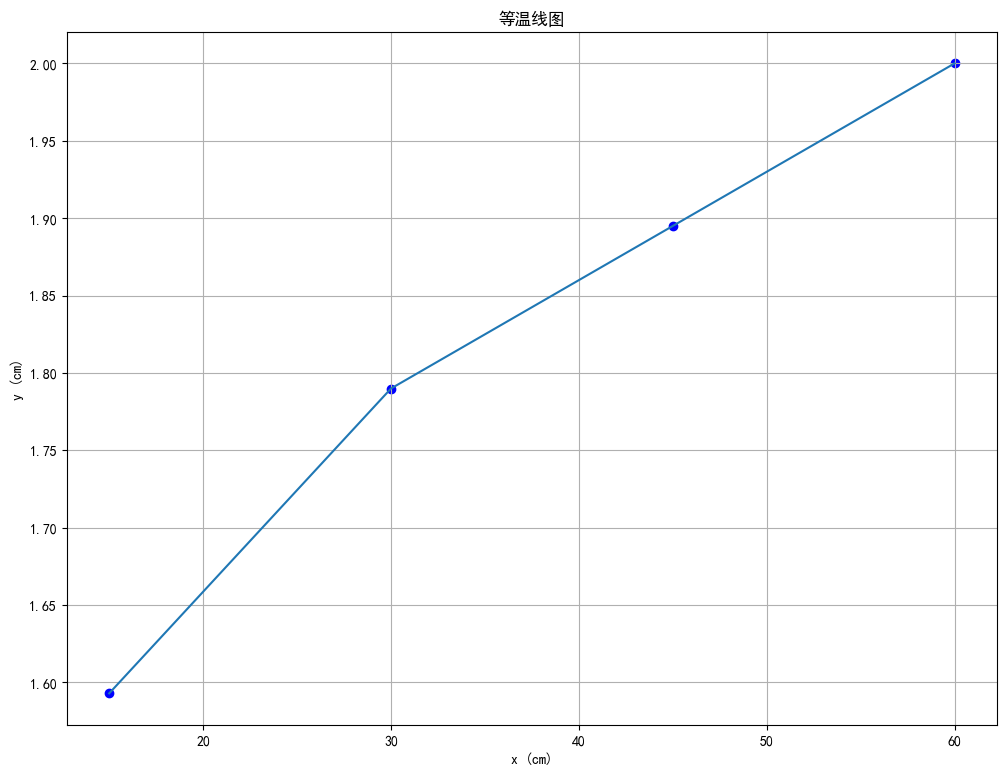

In [73]:
plt.figure(figsize=(12, 9))
plt.plot(x,aim)
plt.scatter(x, aim, color='b')
plt.title('等温线图')
plt.xlabel('x (cm)')
plt.ylabel('y (cm)')
plt.grid(True)
plt.show()